<a href="https://colab.research.google.com/github/pratikpanda-debug/ML-project/blob/master/Exploratory_Data_Analysis_of_Car_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

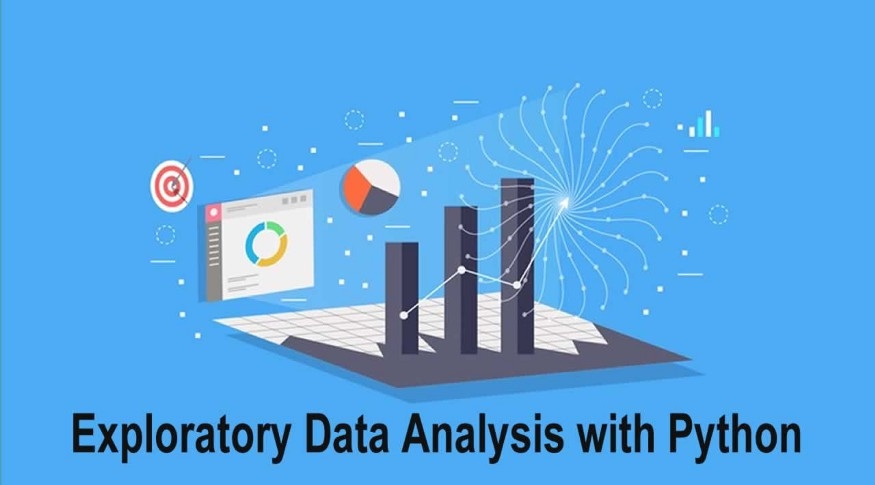

# **Introduction:-**


## **1) What is Exploratory Data Analysis?**

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

## **2) How to perform Exploratory Data Analysis?**

This is one such question that everyone is keen on knowing the answer. Well, the answer is it depends on the data set that you are working. There is no one method or common methods in order to perform EDA, whereas in this tutorial you can understand some common methods and plots that would be used in the EDA process.

## **3) What data are we exploring today?**




Since I am a huge fan of cars, I got a very beautiful data-set of cars from Kaggle. The data-set can be downloaded from the given link. To give a piece of brief information about the data set this data contains more of 10, 000 rows and more than 10 columns which contains features of the car such as Engine Fuel Type, Engine Size, HP, Transmission Type, highway MPG, city MPG and many more. So in this tutorial, we will explore the data and make it ready for modeling.

# **1.Importing the required libraries for EDA :-**

---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       # for visualisation purpose
import matplotlib.pyplot as plt             # for visualisation purpose
%matplotlib inline
import plotly.graph_objects as go

## **1.1 Loading the data into the dataframe :-**

In [ ]:
df=pd.read_csv('data.csv')
#reading the data

In [ ]:
#To display top 5 row 
df.head(5)

In [ ]:
#to display the bottom 5 rows
df.tail(5)

## **1.2 Checking the types of data and basic summary stats :-**

Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string,if in that case we have to convert that string to the integer data only then we can plot the data via a graph. Here in this case the data is already in integer format so nothing to worry

In [ ]:
df.info()

## **Checking the types of data :-**

 
Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string or object, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.

In [ ]:
df.dtypes

In [ ]:
df.describe()

# **2.Dropping irrelevant columns:-**
This is certainly needed in EDA because sometimes there would be coloumns that we use and in such cases dropping is useful. In this case, the columns such as Engine Fuel Type and Number of doors may not be very relevant.

In [ ]:
df=df.drop(['Engine Fuel Type','Number of Doors','Market Category'], axis=1)
df.head(5)

# **3. Renaming the columns :-**
In this instance, most of the column names are very confusing to read, so I just tweaked their column names. This is a good approach it improves the readability of the data set.

In [ ]:
df= df.rename(columns = {'Engine HP':'HP','Engine Cylinders':'Cylinders','Transmission Type':'Transmission','Driven_Wheels':'Drive Mode','highway MPG':'MPG-H','city mpg':'MPG-C','MSRP':'Price'})
df.head(5)
#renaming coloumns as per mentioned in the steps

# **4.Dropping the duplicate rows :-**
This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. 

In [ ]:
df.shape

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ',duplicate_rows_df.shape)

In [ ]:
df=df.drop_duplicates()
df.head(5)

In [ ]:
df.shape

## **4.1 Dropping the missing or null values:-**




This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, because many people just replace the missing values with the mean or the average of that column, but in this case, I just dropped that missing values. This is because there is nearly 100 missing value compared to 10,000 values this is a small number and this is negligible so I just dropped those values.

In [ ]:
print(df.isnull().sum())

In [ ]:
df=df.dropna()                            # Dropping the missing values
df.count()

In [ ]:
print(df.isnull().sum())

# **5.Detecting Outliers :-**
 
 
 An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It’s often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it’s a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers.

In [ ]:
sns.boxplot(x=df['Price'])

In [ ]:
sns.boxplot(x=df['HP'])

In [ ]:
sns.boxplot(x=df['Cylinders'])

In [ ]:
sns.boxplot(data=df,orient='h',palette='Set2')

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

# **6. What are the most represented car brands ?**

In [ ]:
counts=df['Make'].value_counts()*100/sum(df['Make'].value_counts())

In [ ]:
popular_labels=counts.index[:10]
colors=['green',]*len(popular_labels)
colors[0]='red'
fig=go.Figure(data=[go.Bar(x=counts[:10],y=popular_labels,marker_color=colors,orientation='h')])
fig.update_layout(title_text='Top 10 Car Brands in the Dataset',xaxis_title="Percentage",yaxis_title="Car Brand")

In [ ]:
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)               

# **7.Correlation matrix :-**

In [ ]:
df.corr()

## **High correlation between :-**

1.   Cylinders and HP
2.   highway mpg and city mpg
3.   year and price

## **conlusions withdrawn:-**
 As we can see that more the no of cylinder more will be the horsepower of the vehicle and anothor conclusion can also be drawn that the highway mpg and city mpg are directly proportional to each other and hence are highly correlated to each other, again looking at the values of year and the price we can see that there is a correlation between them.

## **High Anticorrelation:-**


1.   Cylinders and highway mpg
2.   cylinders and city mpg

# **conclusions drawn:-**
as we can see that the more no of cylinders more will be the HP but highway and city mpg will be lower and lower and hence we see a negetive correlation between these two above mentioned parameters. 



# **Heat Maps :-**
Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

# **scatter plot:-**
We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

# **8. Which vehicle style was sold the most ?**

In [ ]:
counts=df['Vehicle Style'].value_counts()*100/sum(df['Vehicle Style'].value_counts())

In [ ]:
popular_labels=counts.index[:10]
colors=['orange',]*len(popular_labels)
colors[0]='blue'
fig=go.Figure(data=[go.Bar(x=counts[:10],y=popular_labels,marker_color=colors,orientation='h')])
fig.update_layout(title_text='most preferred vehicle style',xaxis_title="Percentage",yaxis_title="Vehicle Style")

Here from the chart we can see that **Sedan** cars were the most sold cars followed by 4dr SUV

# **Vehicle Style type and Drive type analysis**

In [ ]:
sns.countplot(y='Vehicle Style',data=df, hue='Drive Mode')
plt.title("Vehicle Type v/s Drive mode Type")
plt.ylabel('Vehicle Type')
plt.xlabel('Count of vehicles')

# **Making a New group "Price_group"**

In [ ]:
 #Create a new column 'Price_group' and assign the value based on car price
df['price_group'] = pd.cut(df['Price'],[0,20000,40000,60000,80000,100000,600000], 
                                labels = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K'], include_lowest = True)
df['price_group'] = df['price_group'].astype(object)

In [ ]:
(df['price_group'].value_counts() / len(df) *100).plot.bar(figsize=(10,6))
plt.title("Price Group bar diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Price Group');

**conclusion drawn:-**
*Here we see that nearly 55 percent of the cars are in the price range of 20k-39k and only few percent cars are in the range of 60k-79k.*

# **Plotting graphs between different parameters with our target variable(ie. price) and checking there relations and looking at the insights :-**

**i) Here we plot the bargraph between year and price and see that there is a considerable amount of correlation amoung these two parameters.**

In [ ]:
sns.barplot(df['Year'],df['Price'])

**i) Plotting the scatter plot we see that there is abit of overlapping of the values of the two considerred parameters which proves there correlationship.**

In [ ]:
sns.scatterplot(df['Year'],df['Price'])

**ii) Here we plot the bargraph between HP and price and see that there is a considerable amount of correlation amoung these two parameters.**

In [ ]:
sns.barplot(df['HP'],df['Price'])

**ii) Plotting the scatterplot for horsepower and price we see that there is ahell lot of more overlapping in the graph which defines that they are highly correlated parameters and is justified as well coz the vehicle with more horsepower is for giving more better performance and hence comes under higher priced class.**

In [ ]:
sns.scatterplot(df['HP'],df['Price'])

**iii) Here we plot the bargraph between cylinders and price and see that there is a considerable amount of correlation amoung these two parameters.**

In [ ]:
sns.barplot(df['Cylinders'],df['Price'])

**iii) When we plot the scatterplot between cylinders and price we see that there 
is a lot of overlapping in the graph which tell its story by itself that these two parameters are highly correlated.**

In [ ]:
sns.scatterplot(df['Cylinders'],df['Price'])

**iv) Here we plot the bargraph between MPG-H and price and see that there is a considerable amount of Aniticorrelation amoung these two parameters because the cars with good milage providing factor comes under economical group and hence are affordable easily with low budget as well.**

In [ ]:
sns.barplot(df['MPG-H'],df['Price'])

**iv) Checking the scatter plot we see that there is very less overlapping and hence we say that these two parametrs are highly anticorrelated and this is justified because the milage that we get is directly proportional to the economy that the vehicle gives and hence as the economy is inversly proportional to the price then we say that these two parameters are highly anticorrelated.**

In [ ]:
sns.scatterplot(df['MPG-H'],df['Price'])

**v) Here we plot the bargraph between MPG-C and price and see that there is a considerable amount of Anticorrelation amoung these two parameters
because the cars with good milage providing factor comes under economical group and hence are affordable easily with low budget as well.**

In [ ]:
sns.barplot(df['MPG-C'],df['Price'])

**v) When we take a look at the scatter plot we see that there is very less overlapping and hence we say that these two parametrs are highly anticorrelated and this is justified because the milage that we get is directly proportional to the economy that the vehicle gives and hence as the economy is inversly proportional to the price then we say that these two parameters are highly anticorrelated.**

In [ ]:
sns.scatterplot(df['MPG-C'],df['Price'])

**vi) Here we plot the bargraph between popularoty and price and see that there is a considerable amount of anticorrelation amoung these two parameters as the cars with low price giving good economy are more preferable by the people**.

In [ ]:
sns.barplot(df['Popularity'],df['Price'])

**vi) After taking a view of the scatter plot we see that there a very very less amount correlation and when we see the heat map we also see that 0.11 correlation which is very less and hence we say that these two parameters are heavily anticorrelated and we justify it very easily as when the economy of the vehicle is more hence more and more no. of people like to buy that car and already we know that the economy is indirectly proportional to the price so popularity becomes inversely proportional to price and hence anticorrelated.** 

In [ ]:
sns.scatterplot(df['Popularity'],df['Price'])

# **9. Base Machine Learning Model :-**

In [ ]:
X = df[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y = df['Price'].values

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

**Q.Why Feature scaling is needed?**

**Ans**.Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

**Q.What Is Multiple Linear Regression (MLR) and why we perform it?**

**Ans.**Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. The goal of multiple linear regression (MLR) is to model the linear relationship between the explanatory (independent) variables and response (dependent) variable.

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

*When we check for the residuals in the plot we see that the residuals are quite normally distributed oviously not up to the mark but still its fine for the first step.*

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

*whe we go for checking the matrices we see the mean absolute error(MAE),Root mean squared error(RMSE) and the R2 Score. for this case we get a r2 score of 0.68* 

# **10. Spot checking algorithms:-**

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

**Q.what is polynomial regression?**

**Ans:-**Polynomial Regression is a regression algorithm that models the relationship between a dependent(y) and independent variable(x) as nth degree polynomial.

**Need for Polynomial Regression:**

The need of Polynomial Regression in ML can be understood in the below points:
 

1.   If we apply a linear model on a linear dataset, then it provides us a good result as we have seen in Simple Linear Regression, but if we apply the same model without any modification on a non-linear dataset, then it will produce a drastic output. Due to which loss function will increase, the error rate will be high, and accuracy will be decreased.
2.   So for such cases, where data points are arranged in a non-linear fashion, we need the Polynomial Regression model. We can understand it in a better way using the below comparison diagram of the linear dataset and non-linear dataset.

In [ ]:
# Predicting a new result with Polynomial Regression
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred)

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

*Here we check for the residuals in the plot we see that the residuals are quite normally distributed and gives satisfactory reasults.*

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

*when we ckewck the matrices here we get the R2 score to be 0.80 which is quite good.*

In [ ]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

**Q.What is support vector machine(SVR)?**

**Ans:-** support-vector machines (SVM) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.It presents one of the most robust prediction methods, based on the statistical learning framework




**Q.What is the key difference between linear regression and SVR?**

**Ans:-**In simple regression we try to minimise the error rate. While in SVR we try to fit the error within a certain threshold.

In [ ]:
# Predicting a new result
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

*When we check here the R2 score we donot find much significant changes in the value as comapred with the polynomial regression model.we get a decent value to be 0.81*

In [ ]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

**Q. What is Random Forest Algorithm?**

**Ans:-**Random Forest is a learning method that operates by constructing multiple decision trees. The final decision is made based on the majority of the trees and is chosen by the random forest.

**Q.Why random forest is most preffered algorithem used in ML models?**

**Ans:-**Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity 


In [ ]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

*checking for the residuals we see that they are perfectly normally distributed minimising the errors to lot of a extent which gives a much beeter and excellently satisfying model.*

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

*looking at the value of the matrices we clearly notice that the error has decresed a lot as compared above one and the R2 score rises to 0.93 value which is much acceptable as compared to previous models.*